In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import random
from numpy import array
import math
import cython
import timeit
from matplotlib.pyplot import scatter
%matplotlib notebook

In [2]:
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (np.tanh(x) ** 2))
    return np.tanh(x)

def relu(x, derivative=False):
    if (derivative == True):
        return 1. * (x > 0)
    return x * (x > 0)

def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm
    
def activation_function(x, derivative=False):
    return relu(x, derivative)

In [3]:
class Autoencoder:
    
    def __init__(self, neuron_list):
        self.layer_count = len(neuron_list)
        self.neuron_list = neuron_list
        self.weights = [abs(np.random.randn(y, x)) / 700 for x, y in zip(neuron_list[:-1], neuron_list[1:])] 
        self.biases = [np.zeros((y, 1), dtype=float) for y in neuron_list[1:]]
        self.activations = [np.zeros((x)) for x in neuron_list]
        self.deltas = [np.zeros((x)) for x in neuron_list]
        self.learning_rate = 0.01
        
    def forward_propogation(self, x):
        self.activations[0] = x      
        for i in range(self.layer_count-1):
            self.activations[i+1] = activation_function(np.dot(self.weights[i], self.activations[i])+self.biases[i])
        return self.activations[-1]
    
    def encode(self, x):
        self.activations[0] = x      
        for i in range(self.layer_count-1):
            self.activations[i+1] = activation_function(np.dot(self.weights[i], self.activations[i])+self.biases[i])
        return self.activations[int(self.layer_count / 2)]
    
    def compute_deltas(self,output_labels):
        # Compute last layers' activations
        for i in range(self.neuron_list[-1]):
            self.deltas[-1][i] = 2*activation_function(self.activations[-1][i],True)*(output_labels[i]-activation_function(self.activations[-1][i]))            
        
        # Compute all deltas in all layers
        # l is layer starting from L-1, ending at 1
        for l in range(self.layer_count-2, 0, -1):
            # i is representing neuron count in the layer l
            for i in range(len(self.activations[l])):
                # j is representing next layer's neurons
                for j in range(len(self.activations[l+1])):
                    self.deltas[l][i] = self.deltas[l+1][j]*self.weights[l][j][i]*activation_function(self.activations[l][i],True)
                 
    def back_propogation(self, output_labels):
        # Compute deltas
        self.compute_deltas(output_labels)
        # Update weights 
        # l is layer starting from L-1, ending at 1
        for l in range(0,self.layer_count-1):
            # i is representing neuron count in the layer l
            for i in range(len(self.activations[l])):
                # j is representing next layer's neurons
                for j in range(len(self.activations[l+1])):
                    self.weights[l][j][i] += self.learning_rate*self.deltas[l+1][j]*self.activations[l][i]
                 
    def train(self, x, y, epoch):
        error = []
        for e in range(epoch):
            pass_error = 0
            print("Epoch: " + str(e))
            for i in range(len(x)):
                estimation = self.forward_propogation(x[i])
                #print("Est: " + str(np.transpose(estimation)))
                #print("Out: " + str(np.transpose(y[i])))
                #print("")
                pass_error += 100 * np.sum( ((estimation - y[i])**2) / (y[i]**2) ) / len(estimation)
                self.back_propogation(y[i])
            error.append(pass_error / len(x))
        print("Errors: \n" + str(error))
        return error  


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Errors: 
[99.97966708300203, 99.3550378535406, 84.01483222091623, 18.277120035923257, 4.683397369133217, 5.0086759105751035, 5.019393728869783, 5.016470047383828, 5.01347493525183, 5.0108334271609]


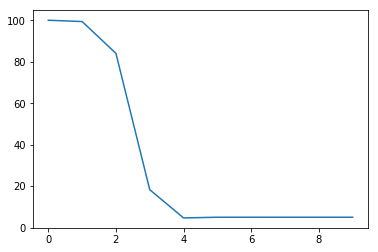

In [4]:
xx = np.array([8, 20])
yy = np.array([3, 15])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.5         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 200).T

xx = np.array([10, 50])
yy = np.array([4, 30])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.7       # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m2 = np.random.multivariate_normal(means, covs, 200).T

inp = []
for i in range(200):
    a1 =  [m2[0][i],  m[1][i]]
    a2 =  [m[0][i],  m2[1][i]]
    a3 = a1 + a2
    a3 /= np.linalg.norm(a3)
    inp.append(np.transpose([a3]))
    
np.set_printoptions(suppress=True)
neuron_list = [4,2,4]
nn = Autoencoder(neuron_list)
err = nn.train(inp,inp, 10)
plt.plot(err)
plt.show()

